# Versuch 3: Test der Faltungsnetze aus Versuch 1 und 2

## Thema

In diesem Notebook geht es um die Evaluierung der trainierten Faltungsnetze aus den Versuchen 1 und 2 mit noch nicht gesehenen Bildaufnahmen von Fahrradwegen. Außerdem wird die Konfusionsmatrix der Ergebnisse analysiert. Es gibt darum zu testen wie gut die gefundenen Modelle generalisieren können.

## Versuchsaufbau

Die zu Klassifizierenden Bildaufnahmen stammen aus den Datensatz 22, 15, TODO(Montainbike). Es gibt eine Excel Datei, welche die Datensätze beschreibt unter datenRoh/beschreibung_der_datensaetze.xlsx. Hier ist zu lesen das die Bewölkung sonnig war. Dies heißt auch das auf vielen Aufnahmen Schatten zu sehen sind siehe Abb. 3.1. Im Gegensatz dazu, siehe Abb. 3.2, sind auf den Bildern aus dem Datensatz 15 keine Schatten zu sehen. Datensatz 22 und 15 entstammen einer ähnlichen Route um Höltigbaum an unterschiedlichen Tagen.

<img src="../daten/datensatz/22/befestigt/zugeschnitten/1523020542579.jpg" alt="Beispiel Aufnahme aus Datensatz 22" width="50px" />
Abbildung 3.1: Beispiel Aufnahme aus Datensatz 22

<img src="../daten/datensatz/15/unbefestigt/zugeschnitten/1521124076409.jpg" alt="Beispiel Aufnahme aus Datensatz 15" width="50px" />
Abbildung 3.2: Beispiel Aufnahme aus Datensatz 15

Versuch Nr. | Datensatz | Anzahl der zu testenden Bilder
--- | --- | --- |
3.1 | 22 | 400
3.2 | 15 | 400
3.3 | 15 | 2000
3.4 | ? | ?
Tabelle 3.1: Verwendete Bilder

Getestet werden die ermittelten Modelle aus dem Versuch 1.9 und 2.4. 

## Versuchsdurchführung

### Versuch 3.1: Nicht gesehene Bilder aus Datensatz 22

In diesem Versuch werden 400 noch nicht gesehene Bilder von den Faltungsnetzen aus dem Datensatz 22 klassifiziert (siehe Tab 3.1). 

## Versuchsbeobachtung

Versuch Nr. | Faltungsnetz aus Versuch Nr. | Test accuracy | Test loss | Precision | Recall
--- | --- | --- | --- | --- | --- | 
3.1 | 1.9 |  |  |  |  |
3.1 | 2.4 |  |  |  |  | 
3.2 | 1.9 |  |  |  |  |
3.2 | 2.4 |  |  |  |  |
3.3 | 1.9 |  |  |  |  |
3.3 | 2.4 |  |  |  |  |
3.4 | 1.9 |  |  |  |  |
3.4 | 2.4 |  |  |  |  |
Tabelle 3.2: Ergebnisse aus den Versuchen


In [16]:
import cv2
import os
import numpy as np
from sklearn.metrics import confusion_matrix
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from keras.models import load_model
from keras.utils import np_utils
import seaborn

In [2]:
images = []

In [3]:
# Läd alle Testbilder
imagePathName = 'C:/Users/morro/Documents/fahrradwegeKlassifizierung/daten/datensatz/22/unbefestigt/testbilder/'
files = os.listdir(imagePathName)
for file in files:
    if "jpg" not in file:
        continue
    images.append(cv2.cvtColor(cv2.imread(imagePathName + file),cv2.COLOR_BGR2RGB))

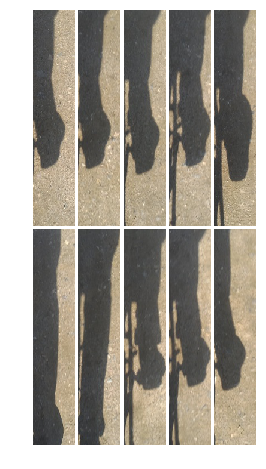

In [4]:
# Einige Beispiele von unbefestigten Wegen
fig = plt.figure(1,figsize=(8,8))
grid = ImageGrid(fig, 111, nrows_ncols=(2, 5), axes_pad=0.05)
imageToShow = 10
for i, img in enumerate(images[0: imageToShow]):
    ax = grid[i]
    ax.imshow(img)
    ax.axis('off')
plt.show()

In [5]:
# Läd alle Testbilder der Klasse befestigt
startIndexPaved = len(images)
imagePathName = 'C:/Users/morro/Documents/fahrradwegeKlassifizierung/daten/datensatz/22/befestigt/testbilder/'
files = os.listdir(imagePathName)
for file in files:
    if "jpg" not in file:
        continue
    images.append(cv2.cvtColor(cv2.imread(imagePathName + file),cv2.COLOR_BGR2RGB))

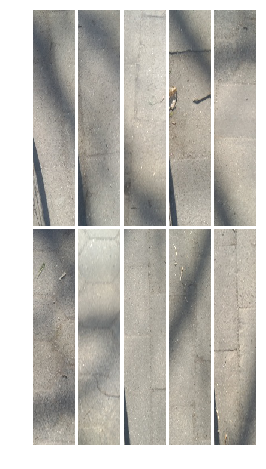

In [6]:
# Einige Beispiele von befestigten Wegen
fig = plt.figure(1,figsize=(8,8))
grid = ImageGrid(fig, 111, nrows_ncols=(2, 5), axes_pad=0.05)
imageToShow = 10
for i, img in enumerate(images[startIndexPaved: startIndexPaved + imageToShow]):
    ax = grid[i]
    ax.imshow(img)
    ax.axis('off')
plt.show()

In [11]:
# Y Klassen Labels zuweisen
# 0 unbefestigt
# 1 befestigt
yLabels = np.zeros(len(images)) 
yLabels[startIndexPaved:len(images)] = 1

In [12]:
# Erstellt einen "one hot encoding vector" für die gelabelten Bilder
yTest = np_utils.to_categorical(yLabels, 0)

In [13]:
xTest = np.array(images)
xTest = xTest.astype('float32')
# Transfomierung der Bildpunkte auf den Wetebereich von 0 bis 1
xTest /= 255
print (xTest.shape) # Form des Arrays (Anzahl der Bilder, Höhe, Breite, Farbkanäle)

(400, 362, 70, 3)


In [14]:
# Läd Modell
experiment9 = load_model('ergebnisse_versuch1/modell_versuch1_9')

[[100 100]
 [ 20 180]]


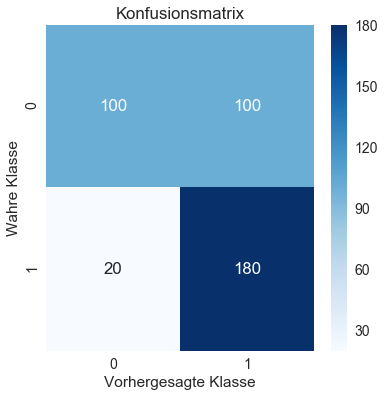

In [18]:
# Konfusionsmatrix
validPreds = experiment9.predict(xTest)
validPreds = np.argmax(validPreds, axis=1)
yTestMax = np.argmax(yTest,axis=1)
cnfMatrix = confusion_matrix(yTestMax, validPreds)
print(cnfMatrix)
seaborn.set(font_scale=1.4)
fig, ax = plt.subplots(figsize=(6,6)) 
ax = seaborn.heatmap(cnfMatrix, fmt="d", cmap=plt.cm.Blues, ax=ax , annot=True)
#ax.set_xticklabels(classNames)
#ax.set_yticklabels(classNames)
plt.title('Konfusionsmatrix')
plt.ylabel('Wahre Klasse')
plt.xlabel('Vorhergesagte Klasse')
plt.show()

In [19]:
score = experiment9.evaluate(xTest, yTest, verbose=0)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

Test Loss: 2.166191290020943
Test accuracy: 0.7
